Calcolo simbolico
====================

SymPy
-----

In questa sezione, introducciamo la libreria (SYMbolic Python). Mentre nei calcoli numerici si opera su numeri,  nel clcolo simbolico lavoriamo su variabili generiche.

La home page di SymPy si trova in  <http://sympy.org/>, e fornisce una documentzione completa ed aggiornata sulla libreria.

Il calcolo simbolico è molto più lento delle operazioni su numeri reali (floating point), e quindi in genere non viene usato per le simulazioni. Tuttavia, è uno strumento potente per la preparazione del codice ed è utile per i conti analitici.

### Output

Prima di iniziare a usare sympy, invochiamo `init_printing`, in modo che presenti le espressioni in un formato esteticamente migliore, al costo di rendere più complicato copiare l'output da una cella ad un'altra. Provate a commentare il comando `sympy.init_printing()` e rieseguire il notebook

In [3]:
import sympy
sympy.init_printing()

### Symbol/simbols

Prima di eseguire qualunque operazione simbolica, è necessario creare le variabili  simboliche usando la funzione di SymPy `Symbol`:

In [2]:
from sympy import Symbol
x = Symbol('x')
type(x)

sympy.core.symbol.Symbol

In [7]:
y = Symbol('y')
2 * x - x

In [8]:
x + y + x + 10*y

In [9]:
y + x - y + 10

Si possono creare contemporaneamente più variabili simboliche usando la  funzione `symbols`. Per esempio, per creare le variabili simboliche `x`, `y` e `z`, possiamo usare:

In [6]:
import sympy
x, y, z = sympy.symbols('x,y,z')
x + 2*y + 3*z - x

Talvolta, dopo aver completato le manipolazioni delle nostre espressioni, vogliamo sostituire le variabili con dei numeri e ottenere un risultato numerico. Per questo c'è il metodo `subs`.

In [7]:
from sympy import symbols
x, y = symbols('x,y')
x + 2*y

In [8]:
x + 2*y.subs(x, 10)

In [9]:
(x + 2*y).subs(x, 10)

In [10]:
(x + 2*y).subs(x, 10).subs(y, 3)

In [11]:
(x + 2*y).subs({x:10, y:3})

È anche possibile sostituire una variabile simbolica ad un'altra. Nell'esempio `y` sostituita da `x` prima `x` si sostituita dal numero `2`.

In [12]:
myterm = 3*x + y**2
myterm

In [13]:
myterm.subs(x, y)

In [14]:
myterm.subs(x, y).subs(y, 2)

Nel seguito tutti gli esempi assumeranno che i simboli necessari siano già stati definiti. Se provate ad eseguire un esempio e SymPy vi dà un messaggio del tipo `NameError: name ’x’ is not defined` è probabilmente perchè dovete definire il simbolo `x` usando uno dei metodi citati all'inizio.

### Tipi numerici

SymPy ha due tipi numerici proprii: `Rational` e `RealNumber`. La classe  Rational rappresenta un numero razionale come una coppia di interi: il numeratore e il denominatore, quindi `Rational(1,2)` rappresenta `1/2`, `Rational(5,2)` rappresenta `5/2` e così via.

In [15]:
from sympy import Rational

In [16]:
a = Rational(1, 10)
a

In [17]:
b = Rational(45, 67)
b

In [18]:
a * b

In [19]:
a - b

In [20]:
a + b

Si noti che la classe  Rational tratta le espressioni rationali *in modo esatto*, a differenza dell'usuale tipo `float` che utilizza la rappresentazione floating point per *approssimare* i numeri razionali.

Si può convertire il tipo `sympy.Rational` in una variable (Python) di tipo floating point  usando `float` oppure il metodo `evalf` dell'oggetto Rational. Il metodo `evalf` accetta un argomento che specifica quante cifre è necessario calcolare per l'approssimazione in floating point (Ovviamente, non tutte queste cifre verranno effettivamente usate nel tipo floating point di Python).

In [21]:
c = Rational(2, 3)
c

In [22]:
float(c)

In [23]:
c.evalf()

In [24]:
c.evalf(50)

<img src="../Humour/Differentiation_and_Integration.png" width="500" align="left"/>

### Derivazione e integrazione

SymPy può eseguire derivate ed integrali in modo simbolico di molte funzioni:

In [8]:
from sympy import Symbol, exp, sin, sqrt, diff
x = Symbol('x')
y = Symbol('y')
diff(sin(x), x)

In [26]:
diff(sin(x), y)

In [27]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x)

In [28]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, y)

In [29]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x).subs(x,1)

In [30]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x).subs(x,1.5)

In [10]:
diff(exp(x), x)

In [32]:
diff(exp(-x ** 2 / 2), x)

La funzione di SymPy `diff()` richiede almeno due argomenti: la funzione da derivare e la variabile rispetto a cui fare la derivata. Derivate di ordine superiore si possono calcolare specificando ulteriori variabili oppure aggiungendo un argomento intero opzionale:

In [33]:
diff(3*x**4, x)

In [34]:
diff(3*x**4, x, x, x)

In [35]:
diff(3*x**4, x, 3)

In [36]:
diff(3*x**4*y**7, x, 2, y, 2)

In [37]:
diff(diff(3*x**4*y**7, x, x), y, y)

L'integrazione ha una sintassi simile. Per l'integrazione indefinita, si specifica la funzione e la variabile di integrazione:

In [5]:
from sympy import integrate
integrate(x**2, x)

In [41]:
integrate(x**2, y)

In [42]:
integrate(sin(x), y)

In [43]:
integrate(sin(x), x)

In [44]:
integrate(-x*exp(-x**2/2), x)

Si possono calcolare integrali definiti fornendo a `integrate()` una ntupla contenente la variabile di integrazione, il limite inferiore e quello superiore. Se si specificano più variabili, viene effettuata una integrazione multipla. Quando SymPy restituisce un risultato di classe `Rational`, è possibile convertirlo in un floating-point con precisione arbitraria.

In [45]:
integrate(x*2, (x, 0, 1))

In [46]:
integrate(x**2, x)

In [47]:
integrate(x**2, x, x)

In [48]:
integrate(x**2, x, x, y)

In [50]:
integrate(x**2, (x, 0, 2), (x, 0, 2), (y, 0, 1))

In [51]:
float(integrate(x**2, (x, 0, 2)))

In [52]:
type(integrate(x**2, (x, 0, 2)))

sympy.core.numbers.Rational

In [53]:
result_rational=integrate(x**2, (x, 0, 2))
result_rational.evalf()

In [54]:
result_rational.evalf(50)

#### Infinito

Il simbolo per "infinito" è `oo` (due volte la lettera o minuscola) e va importato da Sympy.

In [6]:
from sympy import oo

integrate(1/x**2, (x, 1, oo))

In [11]:
integrate(exp(-x**2), (x, -oo, oo))

### Equazioni  differenziali ordinarie (ODE)

SymPy può risolvere diversi tipi di equazioni  differenziali ordinarie con il comando `dsolve`. L'equazione viene passata come primo argomento, `eq`. Il secondo argomento è la funzione `f(x)` rispetto a cui risolvere l'equazione. Un terzo argomento opzionale, `hint`, influenza il metodo che `dsolve` usa: alcuni metodi sono più adatti a certe classi di ODE, o esprimono la soluzione in forma più semplice, che altri.

Per chiamare `dsolve`, è necessario un modo di indicare la funzione ignota che cerchiamo come soluzione e le sue derivate. Per questo ci sono le classi `Function` e `Derivative`:

In [55]:
from sympy import Symbol, dsolve, Function, Derivative, Eq
y = Function("y")
x = Symbol('x')
y_ = Derivative(y(x), x)
dsolve(y_ + 5*y(x), y(x))

Notate che `dsolve` ha introdotto una costante di integrazione, `C1`. Introduce tante costanti quante sono necessarie, chiamandole `Cn`, con `n` un intero. Notate che si assume che il primo argomento passato a `dsolve` sia uguagliato a zero a meno che si usi la funzione `Eq()` per specificare in modo diverso:

In [56]:
dsolve(y_ + 5*y(x), y(x))

In [57]:
dsolve(Eq(y_ + 5*y(x), 0), y(x))

In [58]:
dsolve(Eq(y_ + 5*y(x), 12), y(x))

Il risultato di `dsolve` è una instance della  classe `Equality`. Questo ha la conseguenza che quando vogliamo valutare numericamente la funzione e utilizzarla in altri contesti (per esempio se vogliamo fare il grafico di *y*(*x*) in funzione di *x*), anche dopo aver usato `subs()` e `evalf()`, abbiamo ancora una `Equality`, non un oggetto scalare. Per valutare la funzione in un punto e ottenere un numero bisogna usare l'attributo `rhs`  di `Equality`.

Notate che, in questo caso, utilizziamo `z` per immagazzinare l'`Equality` ritornata da `dsolve`, anche se si riferisce all'espressione di una funzion chiamata `y(x)`, per sottolineare la distinzione fra l'`Equality` in sè e i dati che contiene.

In [59]:
z = dsolve(y_ + 5*y(x), y(x))
z

In [60]:
type(z)

sympy.core.relational.Equality

In [61]:
z.rhs

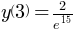

In [62]:
C1=Symbol('C1')
y3 = z.subs({C1:2, x:3})
y3

In [63]:
y3.evalf(10)

In [64]:
y3.rhs

In [65]:
y3.rhs.evalf(10)

In [66]:
z.rhs.subs({C1:2, x:4}).evalf(10)

In [67]:
z.rhs.subs({C1:2, x:5}).evalf(10)

In [68]:
type(z.rhs.subs({C1:2, x:5}).evalf(10))

sympy.core.numbers.Float

Talvolta, `dsolve` può restituire una soluzione più generale del necessario. Per esempio è possibile che sappiamo che alcuni coefficienti che, in generale potrebbero essere complessi, sono, nel caso che ci interessa, sempre reali e positivi. È possibile passare questa informazione a `dsolve` per evitare che la soluzione diventi complicata senza necessità:

In [69]:
from sympy import *
a, x = symbols('a,x')
f = Function('f')
dsolve(Derivative(f(x), x, 2) + a**4*f(x), f(x))

In [70]:
a=Symbol('a',real=True,positive=True)
dsolve(Derivative(f(x), x, 2)+a**4*f(x), f(x))

### Sviluppi in serie

Molte espressioni di SymPy possono essere sviluppate in serie di Taylor usando il metodo `series`. Sono richiesti almeno l'espressione da sviluppare e la variabile rispetto alla quale fare lo sviluppo. È possibile specificare, opzionalmente, il punto attorno al quale sviluppare, il numero massimo di termini e la direzione dello sviluppo (per maggiori informazioni consultate `help(Basic.series)`).

In [1]:
from sympy import *
x = Symbol('x')
sin(x).series(x, 0)

x - x**3/6 + x**5/120 + O(x**6)

In [72]:
series(sin(x), x, 0)

In [2]:
cos(x).series(x, 0.5, 10)

1.11729533119247 - 0.438791280945186*(x - 0.5)**2 + 0.0799042564340338*(x - 0.5)**3 + 0.0365659400787655*(x - 0.5)**4 - 0.00399521282170169*(x - 0.5)**5 - 0.00121886466929218*(x - 0.5)**6 + 9.51241148024212e-5*(x - 0.5)**7 + 2.17654405230747e-5*(x - 0.5)**8 - 1.32116826114474e-6*(x - 0.5)**9 - 0.479425538604203*x + O((x - 0.5)**10, (x, 0.5))

In qualche caso, particolarmente per valutare numericamente la serie e fare il grafico dello sviluppo è necessario rimuovere l'ultimo termine della forma `O(n)`, che è necessario per alcune manipolazioni di serie:

In [74]:
cos(x).series(x, 0.5, 10).removeO()

Lo strumento migliore per fare un grafico è Matplotlib che verrà presentata in seguito. Un esempio per mostrare come fare il grafico di una espressione di SymPy:

In [9]:
from sympy import sin,series,Symbol

x = Symbol('x')
s10 = sin(x).series(x,0,10).removeO()
s20 = sin(x).series(x,0,20).removeO()
s = sin(x)
xx = []
y10 = []
y20 = []
y = []
for i in range(1000):
  xx.append(i / 100.0)
  y10.append(float(s10.subs({x:i/100.0})))
  y20.append(float(s20.subs({x:i/100.0})))
  y.append(float(s.subs({x:i/100.0})))


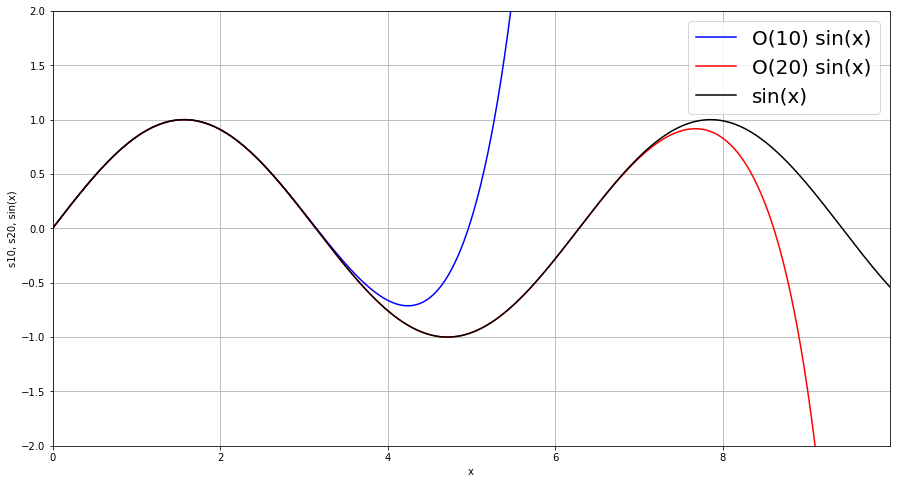

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel('x')
ax.set_ylabel('s10, s20, sin(x)')
ax.margins(x=0.,y=0.1)
ax.grid(True)
ax.plot(xx, y10, c='b', label='O(10) sin(x)')
ax.plot(xx, y20, c='r', label='O(20) sin(x)')
ax.plot(xx, y, c='k', label='sin(x)')
ax.set_ylim(-2.,2.)
#ax.legend(fontsize='x-large')
ax.legend(fontsize='20')

### Equazioni lineari e  inversione di matrici 

SymPy contiene una classe `Matrix` e le funzioni associate che permettono di risolvere simbolicamente un sistems di  equazioni lineari (In seguito, ovviamente, possiamo ottenere risultati numerici con `subs()` e `evalf()`). Consideriamo il caso seguente di una semplice coppia di equazioni lineari:

$$\begin{aligned}
3x + 7y&= 12z\\
4x - 2y&= 5z\end{aligned}$$

Possiamo scrivere il sistema nella forma $A\vec{x}=\vec{b}$ (moltiplicate *A* per $\vec{x}$ per riprodurre  l'equazione originale), dove

$$A=\left(\begin{array}{cc}
3 & 7\\
4 & -2 \end{array} \right),\qquad
\vec{x}=\left(\begin{array}{c}
x\\
y \end{array}\right),\qquad
\vec{b}=\left( \begin{array}{c}
12z\\
5z \end{array}\right).$$

Qui è stato incluso un simbolo, *z*, nel membro di destra per mostrare come i simboli compaiono nella soluzione. In molti casi ci interessa *z* = 1, ma è possibile che sia preferibile usare SymPy invece di risolvere il sistema con metodi numerici, anche quando non le equazioni non contengono quantità simboliche, per la sua capacità di restituire frazioni esatte invece di numeri reali approssimati.

Una strategia per determinare $\vec{x}$ è invertire la matrice *A* e moltiplicare a sinistra per l'inversa, cioè $A^{-1}A\vec{x}=\vec{x}=A^{-1}\vec{b}$. La class `Matrix` di SymPy ha un metodo `inv()` che permette di trovare
l'inverse, e la moltiplicazione fra matrici viene indicata con il simbolo `*`:

In [78]:
from sympy import symbols,Matrix
x, y, z = symbols('x,y,z')
A = Matrix(([3, 7], [4, -2]))
A

⎡3  7 ⎤
⎢     ⎥
⎣4  -2⎦

In [79]:
A.inv()

⎡1/17  7/34 ⎤
⎢           ⎥
⎣2/17  -3/34⎦

In [80]:
b = Matrix(( 12*z,5*z  ))
b

⎡12⋅z⎤
⎢    ⎥
⎣5⋅z ⎦

In [81]:
x = A.inv()*b
x

⎡59⋅z⎤
⎢────⎥
⎢ 34 ⎥
⎢    ⎥
⎢33⋅z⎥
⎢────⎥
⎣ 34 ⎦

In [82]:
x.subs({z:3.3}).evalf(4)

⎡5.726⎤
⎢     ⎥
⎣3.203⎦

In [83]:
type(x)

sympy.matrices.dense.MutableDenseMatrix

Un metodo alternativo di risolvere lo stesso problema è quello di esprimere il sistema usando la matrice *completa*, cioè la matrice che si ottiene appendendo alle colonne (nel nostro esempio) di *A* la colonna $\vec{b}$. La matrice completa è:

$$(A|\vec{b})=\left(\begin{array}{cc|c}
3 & 7 & 12z\\
4 & -2 & 5z\end{array} \right),$$

e come in precedenza può essere costruita come un oggetto `Matrix` di SymPy, ma in questo caso lo passiamo alla  funzione `solve_linear_system()`:

In [84]:
from sympy import Matrix, symbols, solve_linear_system
x, y, z = symbols('x,y,z')
system = Matrix(([3, 7, 12*z],[4, -2, 5*z]))
system

⎡3  7   12⋅z⎤
⎢           ⎥
⎣4  -2  5⋅z ⎦

In [85]:
sol = solve_linear_system(system,x,y)
sol

In [86]:
type(sol)

dict

In [87]:
for k in sol.keys():
    print(k,'=',sol[k].subs({z:3.3}).evalf(4))

x = 5.726
y = 3.203


Una terza possibilità è il metodo `solve()`, i cui argomenti sono le singole equazioni simboliche, invece di una matrice. Come `dsolve()`, `solve()` si aspetta espressioni che assume essere uguali a zero oppure degli oggetti di tipo `Equality`, che possono essere creati in modo semplice con `Eq()`:

In [88]:
from sympy import symbols,solve,Eq
x, y, z = symbols('x,y,z')
solve((Eq(3*x+7*y,12*z), Eq(4*x-2*y,5*z)), x, y)

In [89]:
solve((3*x+7*y-12*z, 4*x-2*y-5*z), x, y)

Per ulteriori informazioni, si veda `help(solve)` e `help(solve_linear_system)`.

### Equazioni non lineari 

Risolviamo una semplice equazione come
$x = x^2$. Ci sono due soluzioni ovvie: *x* = 0 and *x* = 1. Come possiamo farle trovare a Sympy?

In [90]:
import sympy
x, y, z = sympy.symbols('x, y, z')        # creiamo dei simboli
eq = x - x ** 2                           # definiamo l'equazione

In [91]:
sympy.solve(eq, x)                        # solve eq = 0

La  funzione `solve()` si aspetta una espressione da risolvere in modo che faccia zero. Nel nostro esempio, riscriviamo

*x* = *x*<sup>2</sup>
come
*x* − *x*<sup>2</sup> = 0
e poi lo passiamo alla funzione solve.

Facciamo lo stesso con l'equazione:
*x* = *x*<sup>3</sup>

In [92]:
eq = x - x ** 3                           # definiamo l'equazione
sympy.solve(eq, x)                        # solve eq = 0

### Usare espressioni di sympy in numpy

In genere, una espressione creata con sympy non agisce sugli array creati in nella libreria numpy che sono necessari per il calcolo numerico veloce. Per trasformare una espressione in sympy in una funzione che possa operare su un input vettoriale si usa la funzione `lambdify`.

In [4]:
from sympy import sin, cos, symbols, lambdify
import numpy as np
x = symbols('x')
expr = sin(x) + cos(x)
expr

In [6]:
f = lambdify(x, expr, 'numpy') # il terzo argomento è opzionale. Il default è "scipy, numpy".
a = np.array([1, 2])
f(a)


array([1.38177329, 0.49315059])

Se ci sono più variabili:

In [8]:
y,z = symbols('y z')
expr = y**2 - z**2
expr

In [17]:
f = lambdify((y,z), expr)
f(1,2)

Con vettori di piû variabili:

In [18]:
a = np.array([1,3])
b = np.array([2,4])
f(a,b)

array([-3, -7])

### Output: l'interfaccia a LaTeX

SymPy ha la possibilità di formattare il suo output in LaTeX, in modo che sia facile inserirlo in altri documenti. LaTeX è lo standard per tutte le pubblicazioni che contengano formule di matematica o fisica. Non vi laureerete senza impararlo perchè la tesi la dovrete scrivere in LaTeX.

All'inizio del notebook abbiamo chiamato:

```python
sympy.init_printing()
```

Sympy ha capito di essere in Jupyter, e ha reso possibile avere l'output in Latex. Il Jupyter Notebook implementa (una parte di) Latex, e quindi produce l'output tipograficamente piacevole che abbiamo visto.

Possiamo anche vedere l'output di Sympy in formato testo, e il codice sorgente Latex che crea:

In [93]:
print(series(1/(x+y), y, 0, 3))

y**2/x**3 - y/x**2 + 1/x + O(y**3)


In [94]:
print(latex(series(1/(x+y), y, 0, 3)))

\frac{y^{2}}{x^{3}} - \frac{y}{x^{2}} + \frac{1}{x} + \mathcal{O}\left(y^{3}\right)


In [95]:
print(latex(series(1/(x+y), y, 0, 3), mode='inline'))

$\frac{y^{2}}{x^{3}} - \frac{y}{x^{2}} + 1 / x + \mathcal{O}\left(y^{3}\right)$
